In [1]:
import numpy as np
import matplotlib.pyplot as plt
from memfunctions.mem import kernel_calculation, solve_MEM, solve_Tik, \
    solve_noreg, A2pdf
from memfunctions.plotting import plot_MEM, plot_Tik, plot_noreg
from memfunctions.distributions import norm_pdf, chi_distribution

First, we create some sample data - a cSTED distance distribution of the interdye distance composed of two chi-distribtutions.

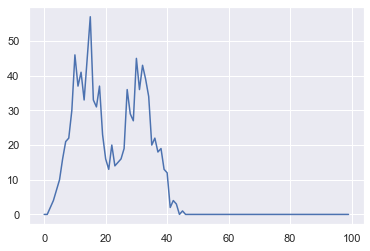

In [22]:
meanR = (10, 25) # lifetime of 1 and 4 ns
amp = (0.5, 0.5) # equal weight
N = 1000 # number of samples
r = np.linspace(0,80,100) # distance axis
s = 4.0 # the width
model = np.zeros(r.shape)
for i in range(len(meanR)):
    model += amp[i]*chi_distribution(r,meanR[i],s)
model *= N
# add noise
model = np.random.poisson(model)
plt.plot(model)

Define the kernel function:

In [23]:
def kernel_function(r,meanR,s,N):
    return N*chi_distribution(r,meanR,s)

Do the MEM analyis:

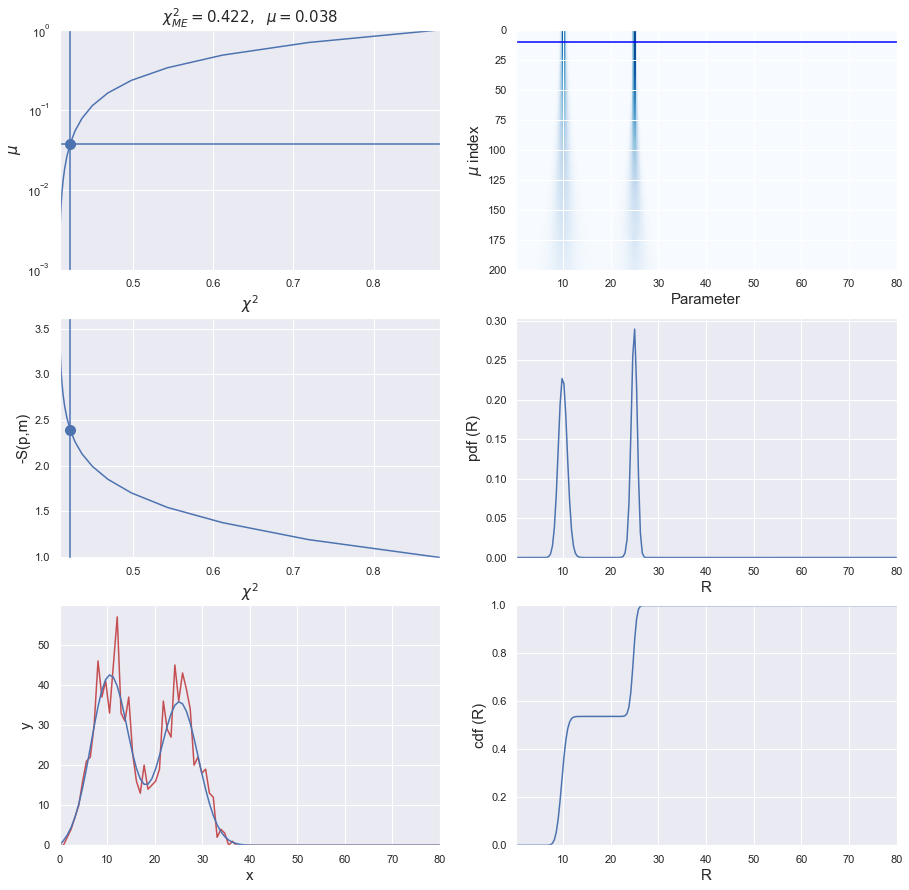

In [24]:
param_range = np.linspace(0.1,80,200)
# precalculations
F_R, param_range, mParam, c, q, H = kernel_calculation(r, model, lambda x : kernel_function(r,x,s,N), param_range)
p, muRange, chiRange, SRange = solve_MEM(c,q,H,mParam,n_mu=20,mu_min=0.001,mu_max=1)
result = A2pdf(p,mParam,param_range)
plot_MEM(10,r,model,param_range,mParam,p,F_R,chiRange,muRange,SRange)

Using Tikhonov regularization:

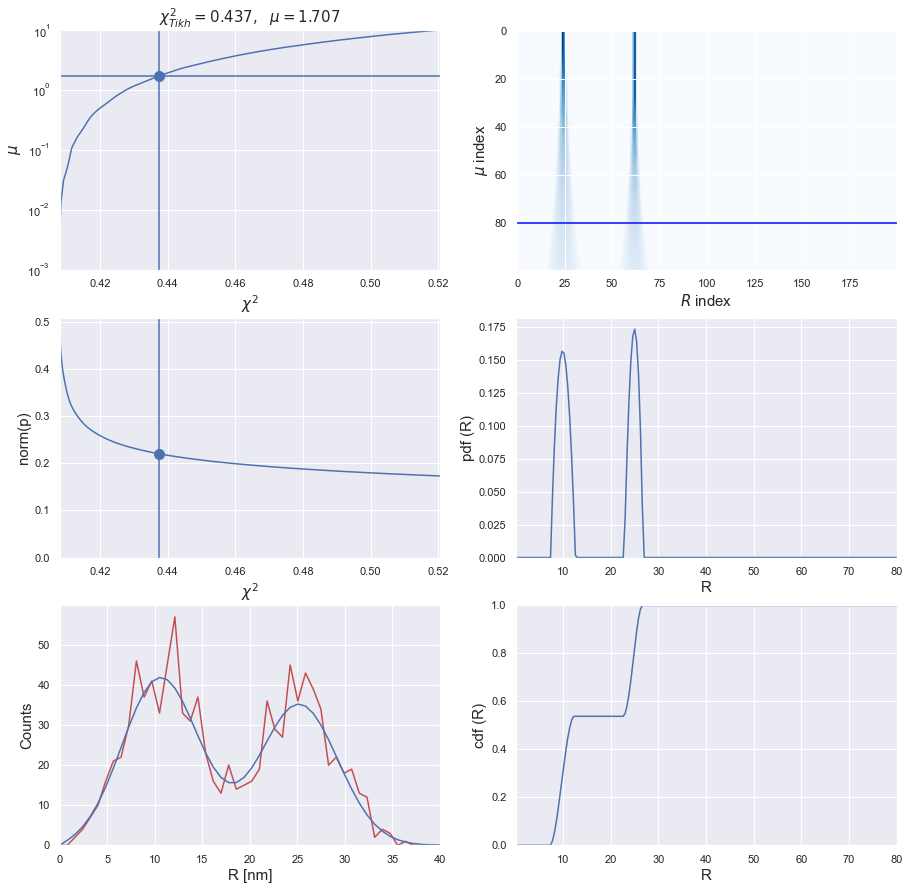

In [34]:
param_range = np.linspace(0.1,80,200)
# precalculations
F_R, param_range, mParam, c, q, H = kernel_calculation(r, model, lambda x : kernel_function(r,x,s,N), param_range)
p, muRange, chiRange, SRange = solve_Tik(c,q,H,mu_min=0.001,mu_max=10)
result = A2pdf(p,mParam,param_range)
plot_Tik(80,r,model,param_range,mParam,p,F_R,chiRange,muRange,SRange)

No regularization:

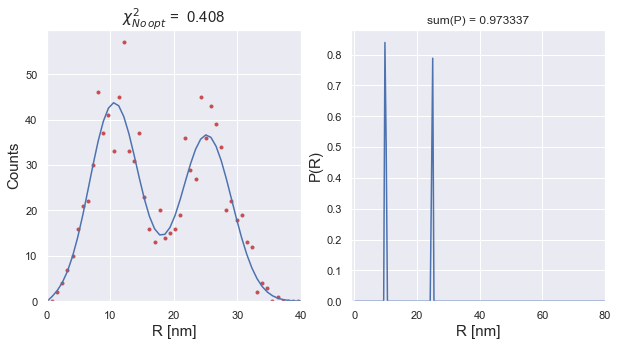

In [37]:
param_range = np.linspace(0.1,80,200)
# precalculations
F_R, param_range, mParam, c, q, H = kernel_calculation(r, model, lambda x : kernel_function(r,x,s,N), param_range)
p, chi2 = solve_noreg(c,q,H)
result = A2pdf(p,mParam,param_range)
plot_noreg(r,model,F_R,param_range,mParam,p,chi2)